In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
import numpy as np

In [56]:
df = pd.read_csv("chegadas_2023.csv", encoding="ANSI", delimiter=';')
df

,Continente,cod continente,Pais,cod pais,UF,cod uf,Via,cod via,Ano,Mes,cod mes,Chegadas
0,América do Sul,4,Peru,34,Acre,1,Aéreo,1,2023,Novembro,11,0
1,América do Sul,4,Peru,34,Acre,1,Aéreo,1,2023,Novembro,11,0
2,Ásia,5,Outros países,56,Outras Unidades da Federação,99,Aéreo,1,2023,Junho,6,0
3,Europa,6,Alemanha,57,Outras Unidades da Federação,99,Aéreo,1,2023,Janeiro,1,12
4,Europa,6,Alemanha,57,Outras Unidades da Federação,99,Aéreo,1,2023,Fevereiro,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...
34759,Europa,6,Suécia,85,Santa Catarina,24,Fluvial,4,2023,Dezembro,12,0
34760,Europa,6,Suíça,86,Santa Catarina,24,Fluvial,4,2023,Dezembro,12,0
34761,América do Sul,4,Uruguai,36,Santa Catarina,24,Fluvial,4,2023,Marco,3,29
34762,América do Sul,4,Uruguai,36,Santa Catarina,24,Fluvial,4,2023,Abril,4,0


In [57]:
df = df.drop(columns=['UF', 'cod pais', 'cod continente', 'cod uf', 'cod via', 'cod mes', 'Chegadas'])
df

,Continente,Pais,Via,Ano,Mes
0,América do Sul,Peru,Aéreo,2023,Novembro
1,América do Sul,Peru,Aéreo,2023,Novembro
2,Ásia,Outros países,Aéreo,2023,Junho
3,Europa,Alemanha,Aéreo,2023,Janeiro
4,Europa,Alemanha,Aéreo,2023,Fevereiro
...,...,...,...,...,...
34759,Europa,Suécia,Fluvial,2023,Dezembro
34760,Europa,Suíça,Fluvial,2023,Dezembro
34761,América do Sul,Uruguai,Fluvial,2023,Marco
34762,América do Sul,Uruguai,Fluvial,2023,Abril


In [58]:
df['Continente'] = df['Continente'].str.replace('é', 'e')
df['Continente'] = df['Continente'].str.replace('Á', 'A')
df

,Continente,Pais,Via,Ano,Mes
0,America do Sul,Peru,Aéreo,2023,Novembro
1,America do Sul,Peru,Aéreo,2023,Novembro
2,Asia,Outros países,Aéreo,2023,Junho
3,Europa,Alemanha,Aéreo,2023,Janeiro
4,Europa,Alemanha,Aéreo,2023,Fevereiro
...,...,...,...,...,...
34759,Europa,Suécia,Fluvial,2023,Dezembro
34760,Europa,Suíça,Fluvial,2023,Dezembro
34761,America do Sul,Uruguai,Fluvial,2023,Marco
34762,America do Sul,Uruguai,Fluvial,2023,Abril


In [59]:
df['Via'].unique()

array(['Aéreo', 'Terrestre', 'Marítimo', 'Fluvial'], dtype=object)

In [60]:
df['Via'] = df['Via'].str.replace('é', 'e')
df['Via'] = df['Via'].str.replace('í', 'i')
df['Via'].unique()

array(['Aereo', 'Terrestre', 'Maritimo', 'Fluvial'], dtype=object)

In [61]:
df['Mes'].unique()

array(['Novembro', 'Junho', 'Janeiro', 'Fevereiro', 'Marco', 'Abril',
       'Maio', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Dezembro'],
      dtype=object)

In [62]:
df['Continente'] = df['Continente'].astype('category')
df['Pais'] = df['Pais'].astype('category')
df['Via'] = df['Via'].astype('category')
df['Ano'] = df['Ano'].astype('category')
df['Mes'] = df['Mes'].astype('category')

In [63]:
df_america_sul = df[df['Continente'] == 'America do Sul']
df_america_sul

,Continente,Pais,Via,Ano,Mes
0,America do Sul,Peru,Aereo,2023,Novembro
1,America do Sul,Peru,Aereo,2023,Novembro
15,America do Sul,Argentina,Aereo,2023,Janeiro
16,America do Sul,Argentina,Aereo,2023,Fevereiro
17,America do Sul,Argentina,Aereo,2023,Marco
...,...,...,...,...,...
34757,America do Sul,Paraguai,Fluvial,2023,Junho
34758,America do Sul,Paraguai,Fluvial,2023,Dezembro
34761,America do Sul,Uruguai,Fluvial,2023,Marco
34762,America do Sul,Uruguai,Fluvial,2023,Abril


In [64]:
df_america_sul = df_america_sul.reset_index(drop=True)
df_america_sul

,Continente,Pais,Via,Ano,Mes
0,America do Sul,Peru,Aereo,2023,Novembro
1,America do Sul,Peru,Aereo,2023,Novembro
2,America do Sul,Argentina,Aereo,2023,Janeiro
3,America do Sul,Argentina,Aereo,2023,Fevereiro
4,America do Sul,Argentina,Aereo,2023,Marco
...,...,...,...,...,...
6118,America do Sul,Paraguai,Fluvial,2023,Junho
6119,America do Sul,Paraguai,Fluvial,2023,Dezembro
6120,America do Sul,Uruguai,Fluvial,2023,Marco
6121,America do Sul,Uruguai,Fluvial,2023,Abril


In [65]:
df_america_sul['Pais'].unique()

['Peru', 'Argentina', 'Bolívia', 'Chile', 'Colômbia', ..., 'Uruguai', 'Venezuela', 'Guiana', 'Suriname', 'Guiana Francesa']
Length: 12
Categories (89, object): ['Alemanha', 'Angola', 'Argentina', 'Arábia Saudita', ..., 'Venezuela', 'África do Sul', 'Áustria', 'Índia']

In [66]:
df_america_sul['Pais'] = df_america_sul['Pais'].str.replace('í', 'i')
df_america_sul['Pais'] = df_america_sul['Pais'].str.replace('ô', 'o')
df_america_sul['Pais'].unique()

array(['Peru', 'Argentina', 'Bolivia', 'Chile', 'Colombia', 'Equador',
       'Paraguai', 'Uruguai', 'Venezuela', 'Guiana', 'Suriname',
       'Guiana Francesa'], dtype=object)

In [67]:
paises_contagem_mensal = df_america_sul[['Pais', 'Mes']].value_counts().sort_index()
paises_contagem_mensal['Argentina']

Mes
Abril         67
Agosto        66
Dezembro     120
Fevereiro     60
Janeiro       61
Julho         56
Junho         58
Maio          61
Marco         58
Novembro     112
Outubro      109
Setembro      56
Name: count, dtype: int64

In [68]:
paises_contagem_mensal['Argentina'].describe()

count     12.000000
mean      73.666667
std       24.477572
min       56.000000
25%       58.000000
50%       61.000000
75%       77.500000
max      120.000000
Name: count, dtype: float64

In [78]:
cvs = []
for pais in np.sort(df_america_sul['Pais'].unique()):
    cv = round((paises_contagem_mensal[pais].describe()['std'] / paises_contagem_mensal[pais].describe()['mean']) * 100, 2)
    cvs.append(cv)
cvs

[33.23,
 32.36,
 32.38,
 37.4,
 37.31,
 25.95,
 44.1,
 34.1,
 37.96,
 28.22,
 33.34,
 33.11]

In [70]:
paises_contagem = df_america_sul['Pais'].value_counts().sort_index()
paises_contagem

Pais
Argentina          884
Bolivia            568
Chile              654
Colombia           657
Equador            451
Guiana             190
Guiana Francesa     12
Paraguai           648
Peru               626
Suriname           156
Uruguai            652
Venezuela          625
Name: count, dtype: int64

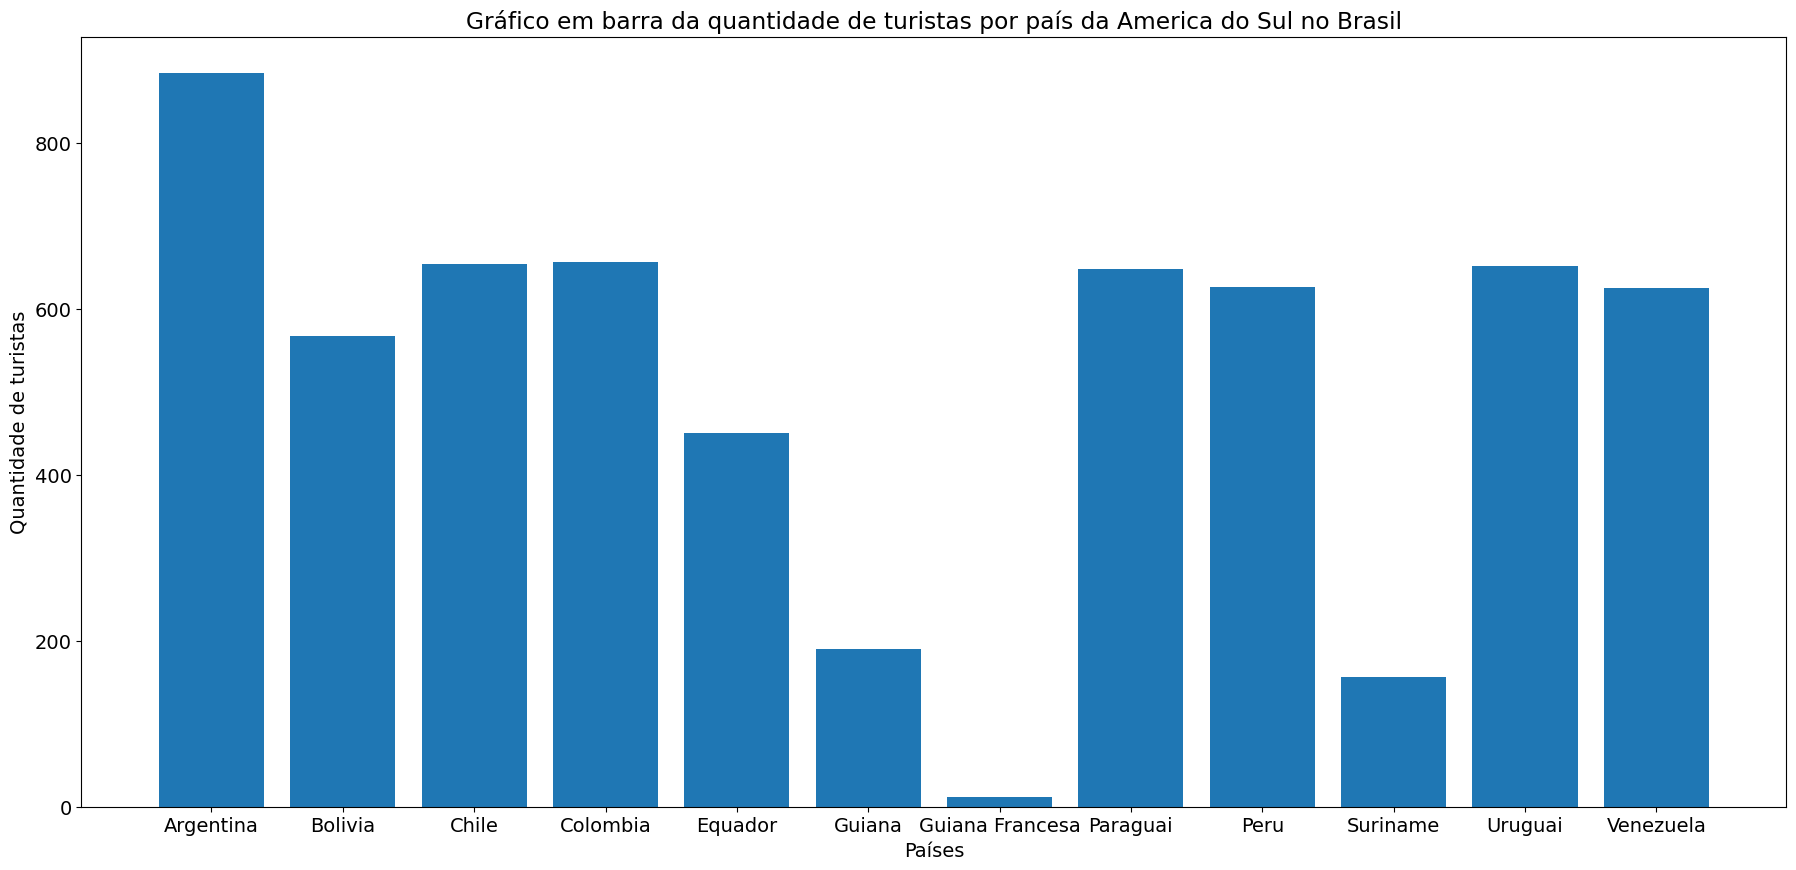

In [71]:
paises = paises_contagem.index
quantidade = paises_contagem.values
fig, ax = plt.subplots(figsize=(22, 10))
plt.rcParams.update({'font.size': 14})
ax.bar(paises, quantidade)
ax.set_xlabel('Países') 
ax.set_ylabel('Quantidade de turistas')
ax.set_title('Gráfico em barra da quantidade de turistas por país da America do Sul no Brasil')
plt.show()

In [72]:
PA_e_PB, PA, PB, PA_dado_PB = symbols('P(A∩B) P(A) P(B) P(A|B)')
probabilidade_cond = Eq(PA_dado_PB, PA_e_PB / PB)
probabilidade_cond

Eq(P(A|B), P(A∩B)/P(B))

In [73]:
quant_total = df.count()['Pais']
prob_argentina = round(paises_contagem['Argentina'] / quant_total, 4)
prob_argentina

0.0254

In [74]:
via_contagem = df['Via'].value_counts()
prob_aereo = round(via_contagem['Aereo'] / quant_total, 4)
prob_aereo

0.5431

In [75]:
pais_via_contagem = df[['Pais', 'Via']].value_counts()
prob_arg_aereo = round(pais_via_contagem['Argentina']['Aereo'] / quant_total, 4)
prob_arg_aereo

0.0099

In [76]:
prob_resultado = solve(probabilidade_cond.subs({PA_e_PB: prob_arg_aereo, PB: prob_aereo}), PA_dado_PB)
print(f"Considerando que a probabilidade de um turista ser argentino e usar a via área é de {round(prob_arg_aereo * 100, 2)}% e a probabilidade de um turista usar a via área é de {prob_aereo * 100}%, então a probabilidade de um turista usar a via área dado que ele é argentino é de {round(prob_resultado[0] * 100, 3)}%")

Considerando que a probabilidade de um turista ser argentino e usar a via área é de 0.99% e a probabilidade de um turista usar a via área é de 54.31%, então a probabilidade de um turista usar a via área dado que ele é argentino é de 1.823%


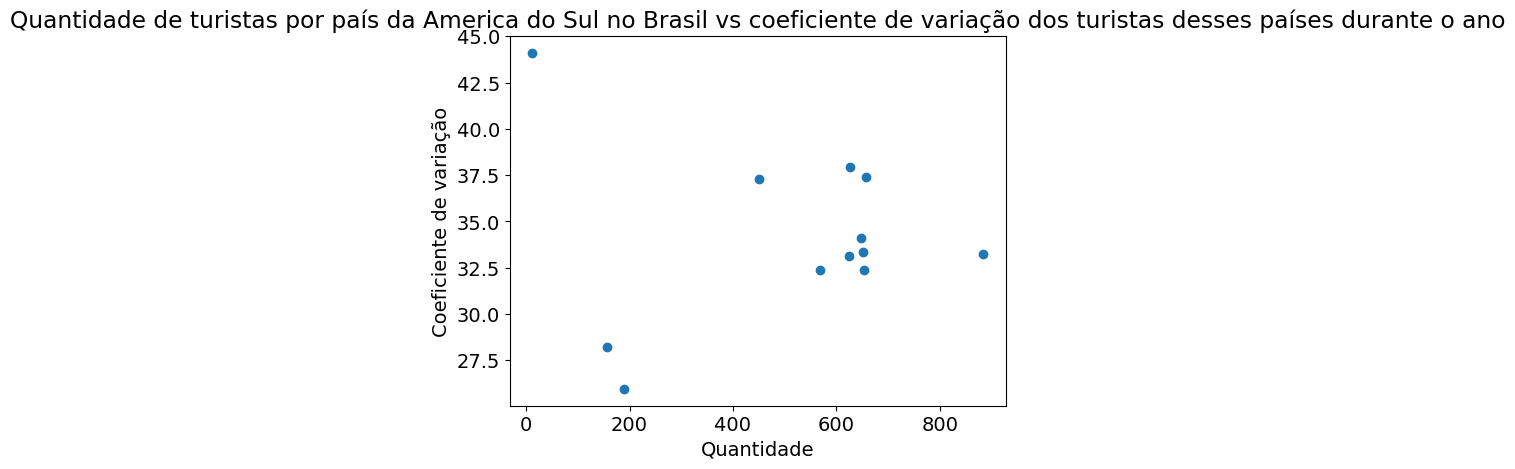

In [79]:
fig, ax = plt.subplots()
ax.scatter(quantidade, cvs)
ax.set_xlabel("Quantidade")
ax.set_ylabel("Coeficiente de variação")
ax.set_title("Quantidade de turistas por país da America do Sul no Brasil vs coeficiente de variação dos turistas desses países durante o ano")
plt.show()

In [102]:
coef_1 = np.polyfit(quantidade, cvs, 1)
coef_2 = np.polyfit(quantidade, cvs, 2)
coef_3 = np.polyfit(quantidade, cvs, 3)
coef_4 = np.polyfit(quantidade, cvs, 4) 
funcao_1 = np.poly1d(coef_1)
funcao_2 = np.poly1d(coef_2)
funcao_3 = np.poly1d(coef_3)
funcao_4 = np.poly1d(coef_4)

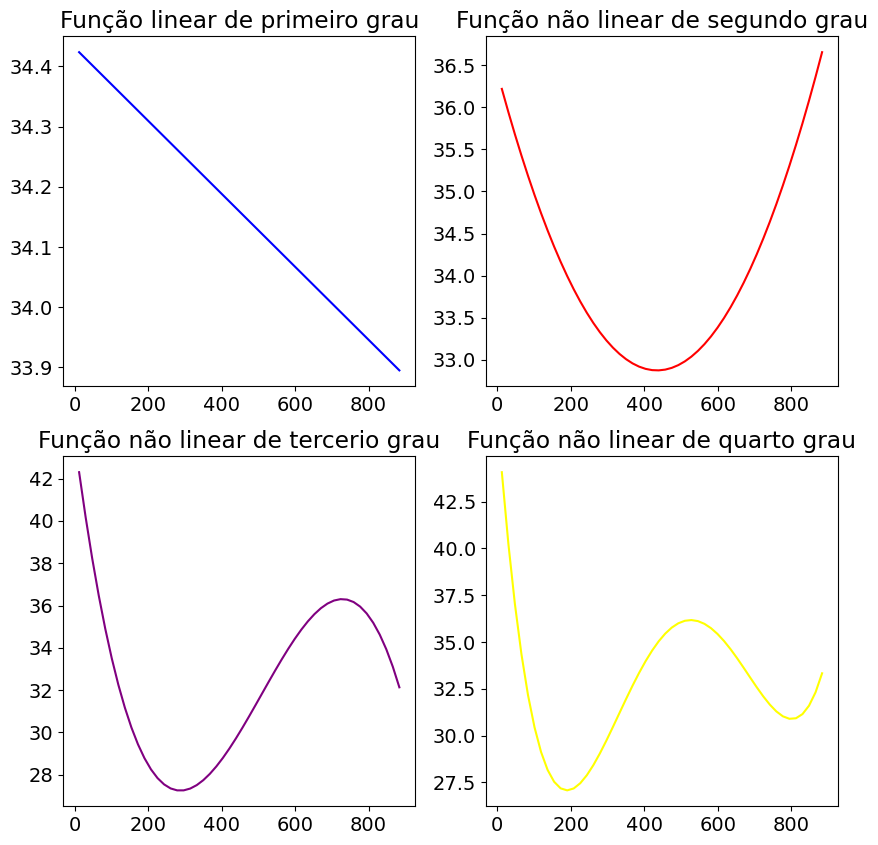

In [104]:
#vai suavizar o grafico, pois vai considerar o intervalo entre o valor minimo e maximo de 50 em 50
x_vals = np.linspace(min(quantidade), max(quantidade), 50)
fig = plt.figure(figsize=(10, 10))
plt1 = plt.subplot(2, 2, 1)
plt1.set_title("Função linear de primeiro grau")
plt2 = plt.subplot(2, 2, 2)
plt2.set_title("Função não linear de segundo grau")
plt3 = plt.subplot(2, 2, 3)
plt3.set_title("Função não linear de tercerio grau")
plt4 = plt.subplot(2, 2, 4)
plt4.set_title("Função não linear de quarto grau")
plt1.plot(x_vals, funcao_1(x_vals), color='blue')
plt2.plot(x_vals, funcao_2(x_vals), color='red')
plt3.plot(x_vals, funcao_3(x_vals), color='purple')
plt4.plot(x_vals, funcao_4(x_vals), color='yellow')
plt.draw()

In [ ]:
print("A função do quarto aparenta ser a que melhor modela as 2 variáveis de acordo com os 4 gráficos analisados.")

In [105]:
coef_4

array([ 8.06227946e-10, -1.63093927e-06,  1.08596968e-03, -2.57916873e-01,
        4.70140773e+01])

In [115]:
x4, x3, x2, x = symbols("x^4 x^3 x^2 x")
y = coef_4[0] * x4 + coef_4[1]*x3 + coef_4[2]*x2 + coef_4[3]*x + coef_4[4]
y

-0.257916873486293*x + 0.00108596968162686*x^2 - 1.63093926611277e-6*x^3 + 8.06227946482863e-10*x^4 + 47.014077298856